# ML- Supervised Learning: Final Project                                                                

##  GitHub repository:
https://github.com/majajov/ML-Supervised-Learning-Project-Cost-Analysis-and-Attribute-Impact-in-the-Automotive-industry

## Author: M.Jovanovski

# Cost Analysis and Attribute Impact in the Automotive Industry

# Problem Description

### The supervised learning problem being tackled in this project involves performing Exploratory Data Analysis (EDA) on an automotive dataset to identify and understand the relationships between the cost (target variable) and the 26 attributes (features) in the dataset. The goal is to build a predictive model that can accurately estimate the cost of an automotive component or service based on its associated attributes.

Understanding the relationship between the cost and various attributes in the automotive industry can have several important applications:

1) Pricing and Cost Estimation: By identifying the significant attributes that impact the cost of automotive components or services, manufacturers and service providers can better estimate the pricing of their products or services. This knowledge can help in optimizing pricing strategies and staying competitive in the market.

2) Cost Optimization: For automotive manufacturers, understanding the factors that influence the cost allows them to identify areas where cost optimization is possible. By focusing on these areas, they can reduce production costs, increase profitability, and offer more affordable products to consumers.

3) Supply Chain Management: A deeper understanding of the cost drivers can help optimize the supply chain. Manufacturers can identify cost-effective sources for specific attributes or materials, thereby reducing overall production costs.

4) Product Development: Insights gained from the analysis can guide the design and development of new automotive components. Engineers can focus on attributes that have a significant impact on cost without compromising the quality of the final product.

5) Decision Making: The knowledge obtained from the analysis can aid in making informed business decisions. Executives and stakeholders can use this information to strategize and prioritize investment in certain attributes or aspects of their products or services.

6) Consumer Insights: Understanding how specific attributes affect the cost can provide valuable insights into consumer preferences and behavior. This information can guide marketing efforts and help in the development of targeted advertising campaigns.

Overall, the significance of this project lies in its potential to provide actionable insights to the automotive industry, leading to cost-effective and competitive products and services. Additionally, the results of this analysis can pave the way for the development of predictive models to estimate costs in real-time, supporting decision-making processes and enhancing the overall efficiency of the automotive sector.


In [1150]:
#IMPORT LIBRARIES 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.simplefilter(action='ignore', category=FutureWarning)


# Data Collection and Preprocessing
Automotive_data.csv is readilly available for download from https://github.com/Opensourcefordatascience/Data-sets - free data depository.
In this project, I perform comprehensive data processing tasks on the Automotive dataset, including data loading, data visualization, data cleaning and handling missing values. These steps ensure the dataset is prepared for analysis and modeling, enabling effective exploration of cost-attribute relationships and building an accurate predictive model for automotive component or service cost estimation.

In [1151]:
#Load data from data set 
df = pd.read_csv('Automotive_dataset.csv')

In [1152]:
#look at the top 5 rows of the data 
df.head()

,symboling,normalized-losses,car_type,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [1153]:
#look at the bottom 5 rows of the data 
df.tail()

,symboling,normalized-losses,car_type,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
815,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
816,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
817,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
818,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
819,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [1154]:
# Look at the shape of the data which will tell me how many rows and columns are in the dataset 

df.shape

(820, 26)

In [1155]:
# Look at the columns of the data frame 

df.keys()
df.columns

Index(['symboling', 'normalized-losses', 'car_type', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [1156]:
# Using describe command to look at the complete description of the data
# This only gives me the summary of the numeric data 
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,104.312195,25.219512,30.751220
std,1.243024,6.010737,12.314672,2.141271,2.439043,519.725702,41.566355,3.964759,39.450810,6.530149,6.873819
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,48.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,70.000000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,95.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,116.000000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,288.000000,49.000000,54.000000


In [1157]:
# Using describe command I am looking at the complete description of the data, this provides me the summary of all the fields
#including the missing and NA fields
df.describe(include='all')

,symboling,normalized-losses,car_type,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,820.000000,820,820,820,820,820,820,820,820,820.000000,...,820.000000,820,820,820,820.000000,820.000000,820,820.000000,820.000000,820
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,NaN,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.4,NaN,NaN,5500,NaN,NaN,?
freq,NaN,164,128,740,672,456,384,480,808,NaN,...,NaN,376,92,80,NaN,NaN,148,NaN,NaN,16
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,104.312195,NaN,25.219512,30.751220,NaN
std,1.243024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.010737,...,41.566355,NaN,NaN,NaN,3.964759,39.450810,NaN,6.530149,6.873819,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,48.000000,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,70.000000,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,95.000000,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,116.000000,NaN,30.000000,34.000000,NaN


In [1158]:
# With .info I get the details of each of the fields, this provides me the  #columns, column name, data type(w/o null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          820 non-null    int64  
 1   normalized-losses  820 non-null    object 
 2   car_type           820 non-null    object 
 3   fuel-type          820 non-null    object 
 4   aspiration         820 non-null    object 
 5   num-of-doors       820 non-null    object 
 6   body-style         820 non-null    object 
 7   drive-wheels       820 non-null    object 
 8   engine-location    820 non-null    object 
 9   wheel-base         820 non-null    float64
 10  length             820 non-null    float64
 11  width              820 non-null    float64
 12  height             820 non-null    float64
 13  curb-weight        820 non-null    int64  
 14  engine-type        820 non-null    object 
 15  num-of-cylinders   820 non-null    object 
 16  engine-size        820 non

In [1159]:
# now find the missing values 
df.isnull()

,symboling,normalized-losses,car_type,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
816,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
817,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
818,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1160]:
#this indicates there are no missing values, however we will do further analysis to inspect the data 
df.isnull().sum()

symboling            0
normalized-losses    0
car_type             0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [1161]:
#I want to look if there are any unique values or special characters that might indicate non-valid symbol/data
for m in df.keys():
    print(m,df[m].unique()[:10])

symboling [ 3  1  2  0 -1 -2]
normalized-losses ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148']
car_type ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz']
fuel-type ['gas' 'diesel']
aspiration ['std' 'turbo']
num-of-doors ['two' 'four' '?']
body-style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels ['rwd' 'fwd' '4wd']
engine-location ['front' 'rear']
wheel-base [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4]
length [168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197. ]
width [64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9]
height [48.8 52.4 54.3 53.1 55.7 55.9 52.  53.7 56.3 53.2]
curb-weight [2548 2823 2337 2824 2507 2844 2954 3086 3053 2395]
engine-type ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
num-of-cylinders ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
engine-size [130 152 109 136 131 108 164 209  61  90]
fuel-system ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' '

Looking at the data above data Isee there is "?" in some of the data, so I am inspecting further to see how many "?" are present in each column |

In [1162]:
# look at the '?'

(df == '?').sum()

symboling              0
normalized-losses    164
car_type               0
fuel-type              0
aspiration             0
num-of-doors           8
body-style             0
drive-wheels           0
engine-location        0
wheel-base             0
length                 0
width                  0
height                 0
curb-weight            0
engine-type            0
num-of-cylinders       0
engine-size            0
fuel-system            0
bore                  16
stroke                16
compression-ratio      0
horsepower             0
peak-rpm               8
city-mpg               0
highway-mpg            0
price                 16
dtype: int64

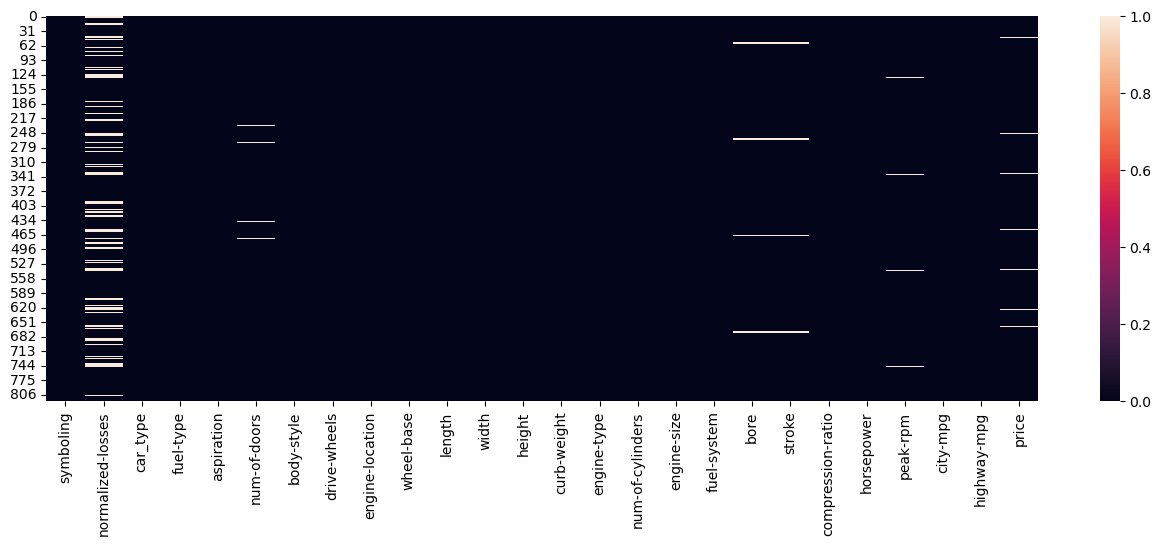

In [1163]:
# Visualizing the missing values with heatmap.
# By doing this, I can make decisions whether to drop the missing values or to replace them. Usually dropping the missing values is not advisable but sometimes might be helpful

plt.figure(figsize=(16,5))
sns.heatmap(df=='?')
plt.show()

In [1164]:
#I am filling-in the missing values 

for m in df.keys():
    if '?' in df[m].unique():
        print(m,df[m].dtype)
        df[m]=df[m].replace({'?':np.nan})

normalized-losses object
num-of-doors object
bore object
stroke object
peak-rpm object
price object


In [1165]:
#I am examining all data fields for number of doors
#Checking for mode (most frequent value)

print(df['num-of-doors'].mode())
df['num-of-doors'].unique()

0    four
Name: num-of-doors, dtype: object


array(['two', 'four', nan], dtype=object)

In [1166]:
#I am replacing the missing data fields with the mode value
df['num-of-doors']= df['num-of-doors'].fillna(df['num-of-doors'].mode()[0])

In [1167]:
# I am verifying that all the mising data and nan fields in the # doors column  have been replaced by the mode value 
df['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [1168]:
df['normalized-losses'].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [1169]:
#let us replace all the fields with the mode value
df['normalized-losses']= df['normalized-losses'].fillna(df['normalized-losses'].mode()[0])

In [1170]:
#I am verifying which attributes have the null value
df.isnull().sum()

symboling             0
normalized-losses     0
car_type              0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                 16
stroke               16
compression-ratio     0
horsepower            0
peak-rpm              8
city-mpg              0
highway-mpg           0
price                16
dtype: int64

In [1171]:
# Checking for unique values in the 'bore' attribute column
df['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', nan, '3.39', '3.76', '3.58', '3.46', '3.8', '3.78',
       '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

In [1172]:
df['bore'].mode()

0    3.62
Name: bore, dtype: object

In [1173]:
# Filling-in the 'na' items in the 'bore' attribute column with the mode value
df['bore']= df['bore'].fillna(df['bore'].mode()[0])

In [1174]:
# I am doing the mode replacement in the 'stroke', 'horsepower', 'peak-rpm'and 'price' attribute columns
df['stroke']= df['stroke'].fillna(df['stroke'].mode()[0])

In [1175]:
df['horsepower']= df['horsepower'].fillna(df['horsepower'].mode()[0])
df['peak-rpm']= df['peak-rpm'].fillna(df['peak-rpm'].mode()[0])
df['price']= df['price'].fillna(df['price'].mode()[0])

In [1176]:
df['car_type'] = df['car_type'].astype(str)
print(df['car_type'].dtypes)
print(df['car_type'].unique())
# Replace 'nan' with a default value or drop rows with 'nan'
df['car_type'].fillna('unknown', inplace=True)  # Replace 'nan' with 'unknown'

object
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


In [1177]:
# I am verifying that there are no more missing values in any attribute column - data cloeaning process has been completed!
df.isnull().sum()

symboling            0
normalized-losses    0
car_type             0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Exploratory Data Analysis (EDA)
In this project, I conduct an extensive Exploratory Data Analysis (EDA) on the Automotive dataset. Through data visualization, I explore various aspects, such as distributions, correlations, and relevant patterns related to the cost and the 26 attributes. This in-depth analysis helps unveil valuable insights, guiding us to understand how different attributes impact the cost of automotive components or services. By delving into the data's nuances, we gain a better understanding of the underlying relationships, which lays the groundwork for building an accurate predictive model for cost estimation.

In [1178]:
df['horsepower'] = df['horsepower'].astype('int8')
df['horsepower'].dtype

dtype('int8')

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

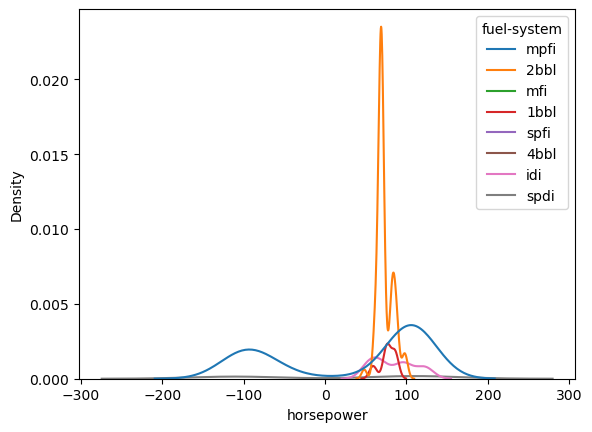

In [1179]:
sns.kdeplot(data = df, x = 'horsepower', hue = 'fuel-system')

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

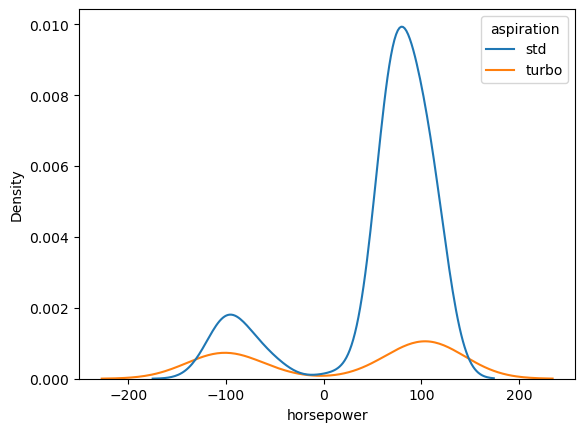

In [1180]:
sns.kdeplot(data = df, x = 'horsepower', hue = 'aspiration')

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

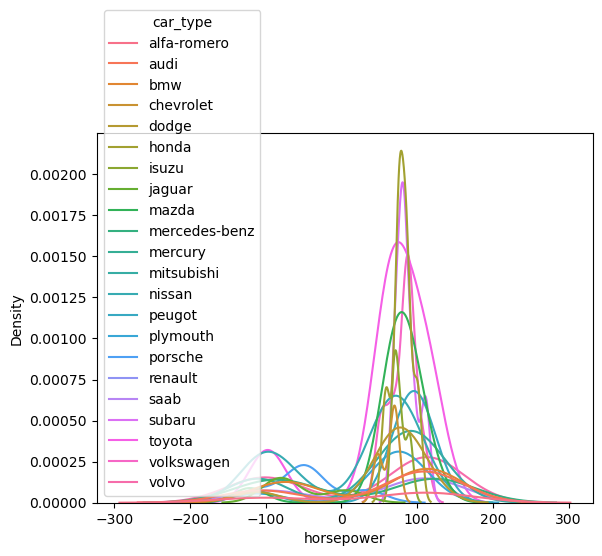

In [1181]:
sns.kdeplot(data = df, x = 'horsepower', hue = 'car_type')

In [1182]:
#Check the correlation between different variables, this gives me a roadmap how to proceed further.
corr = df.corr()


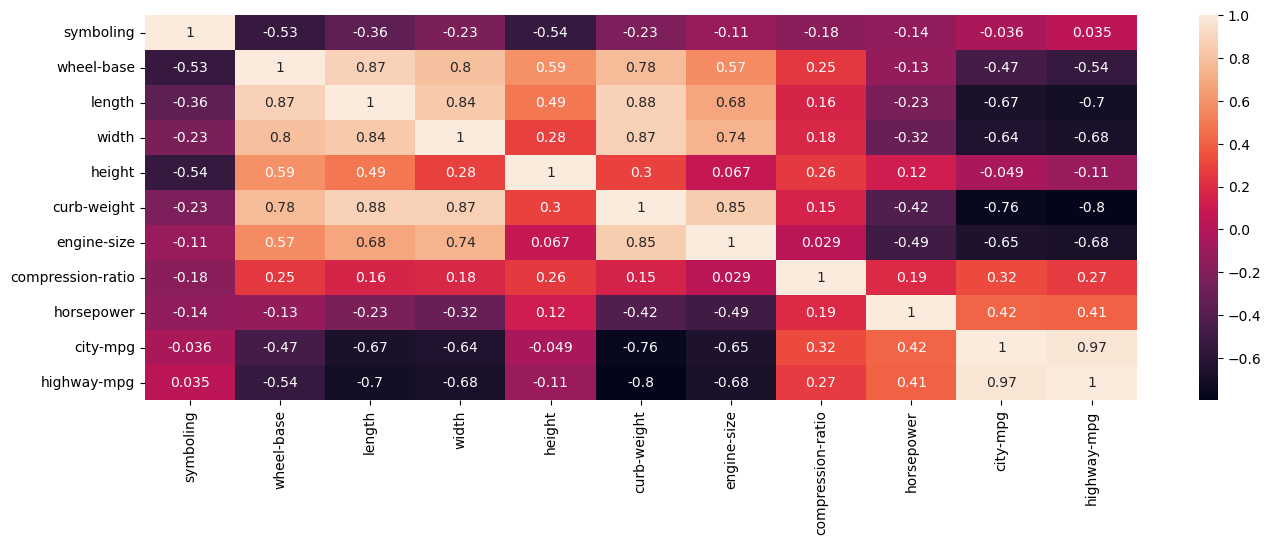

In [1183]:
plt.figure(figsize=(16,5))
sns.heatmap(corr,annot=True)
plt.show()

<Figure size 1600x500 with 0 Axes>

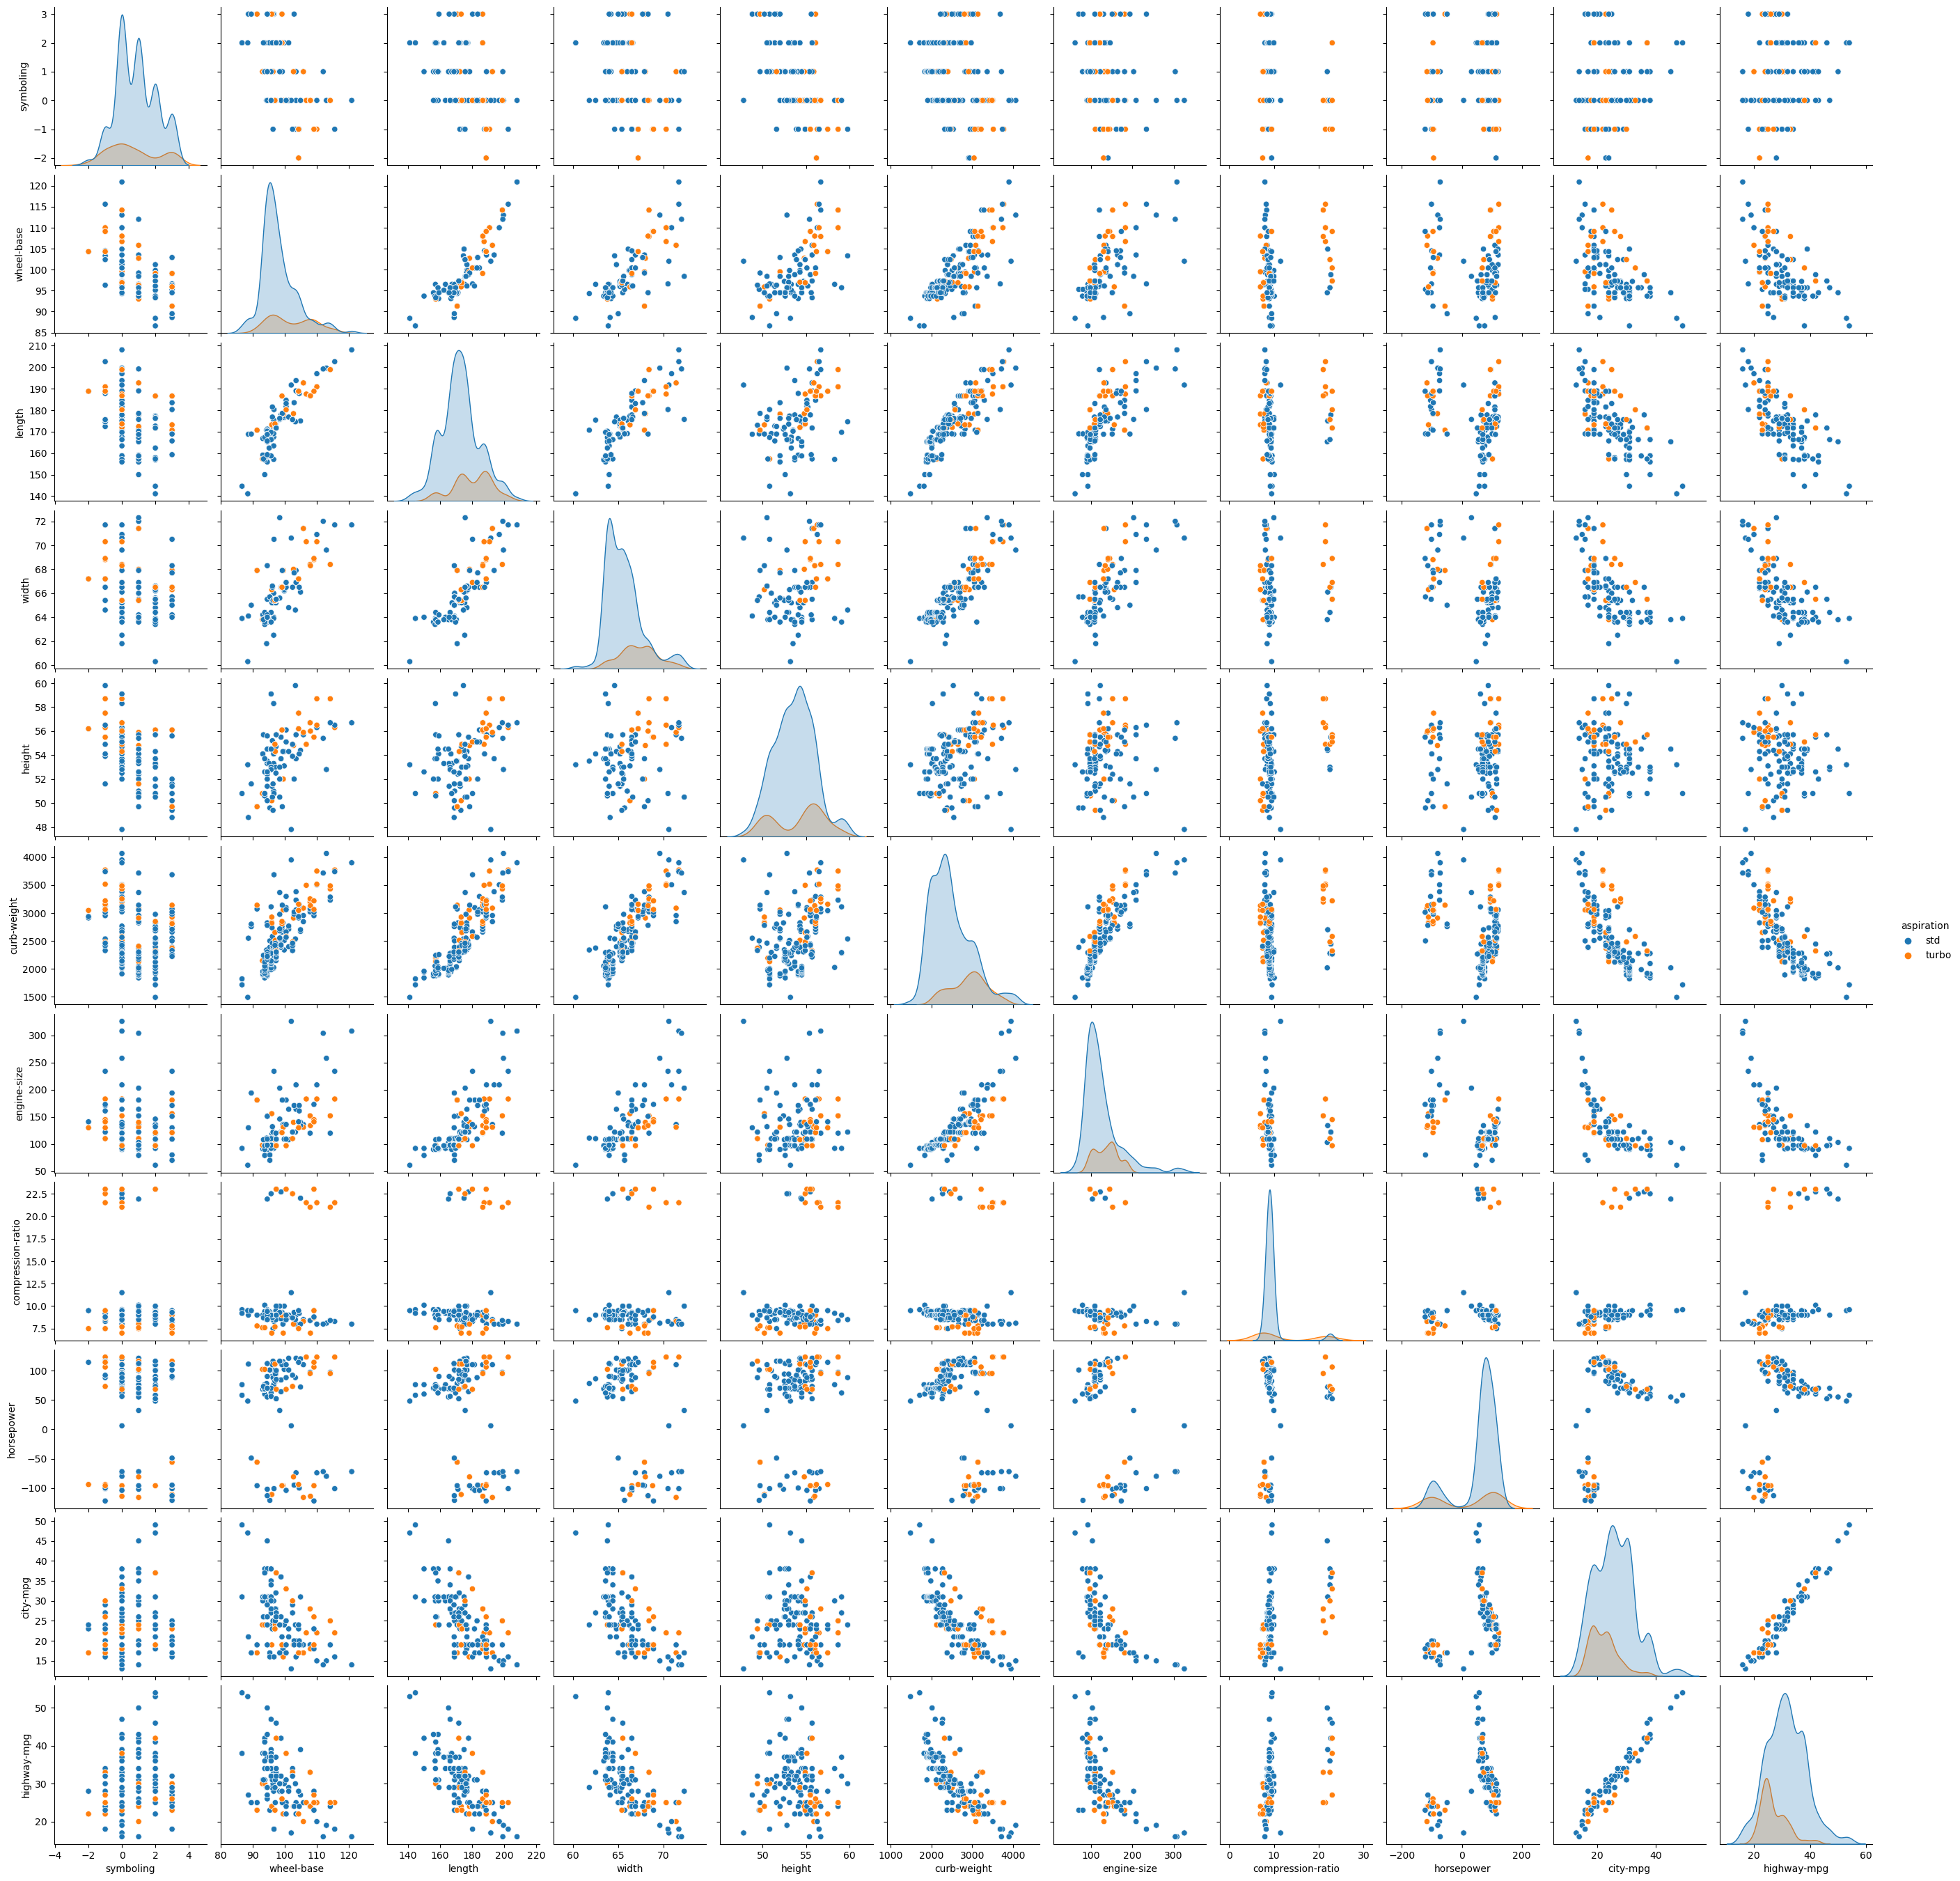

In [1184]:
plt.figure(figsize=(16,5))
sns.pairplot(df,hue='aspiration')
plt.show()

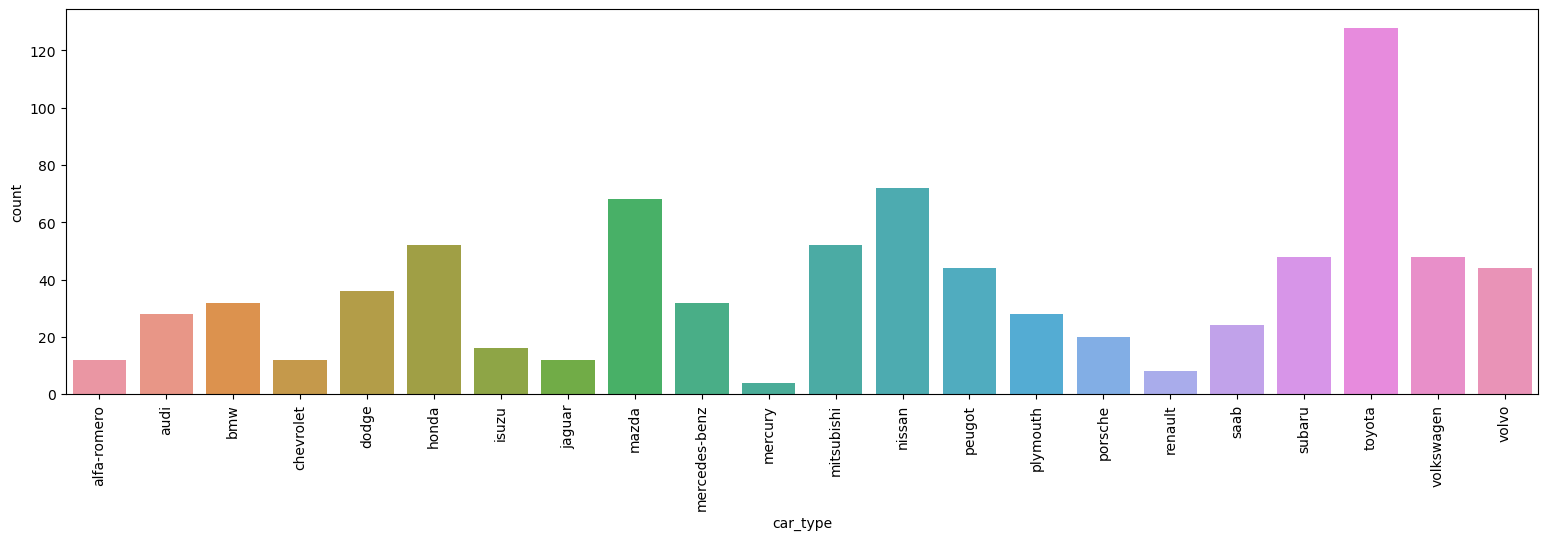

In [1185]:
plt.figure(figsize=(19,5))
sns.countplot(df['car_type'])
plt.xticks(rotation=90)
plt.show()

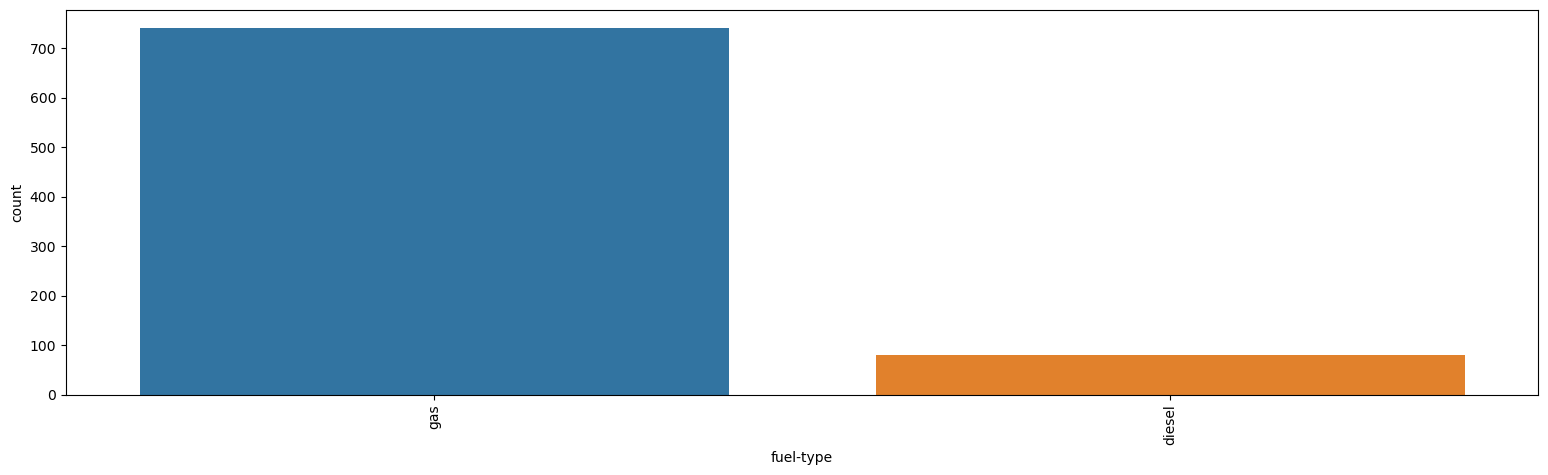

In [1186]:
plt.figure(figsize=(19,5))
sns.countplot(df['fuel-type'])
plt.xticks(rotation=90)
plt.show()

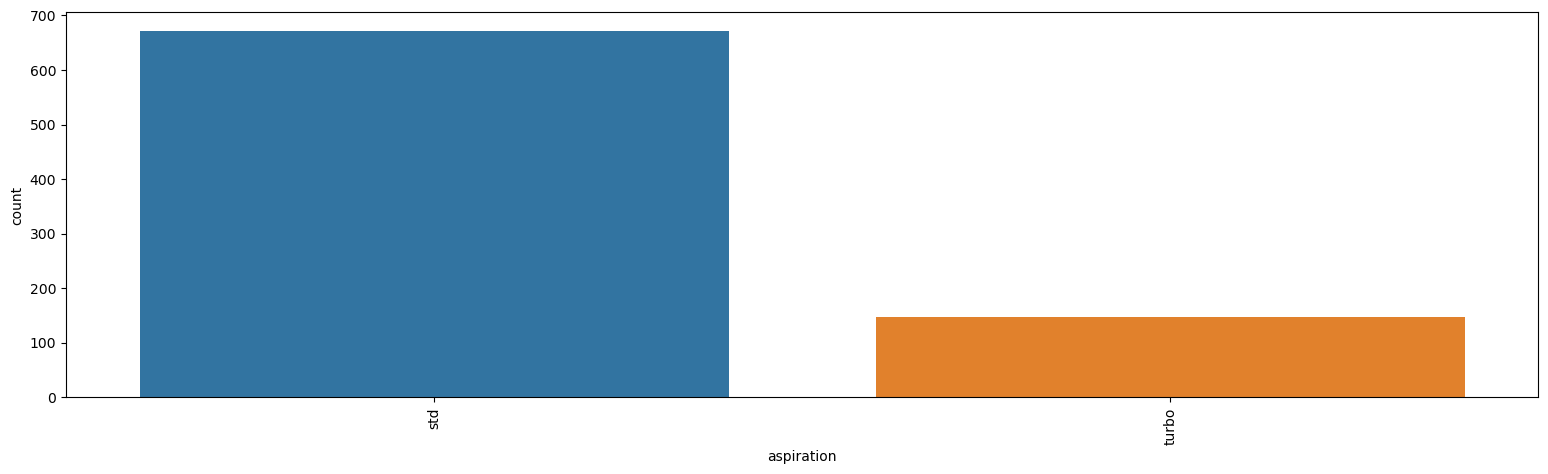

In [1187]:
plt.figure(figsize=(19,5))
sns.countplot(df['aspiration'])
plt.xticks(rotation=90)
plt.show()

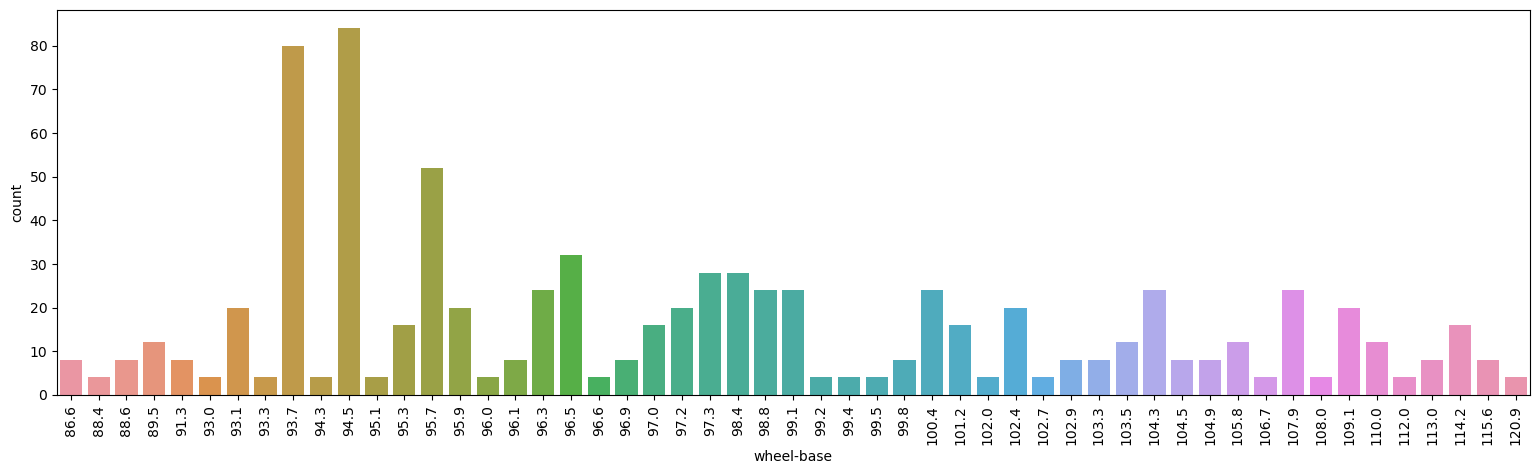

In [1188]:
plt.figure(figsize=(19,5))
sns.countplot(df['wheel-base'])
plt.xticks(rotation=90)
plt.show()

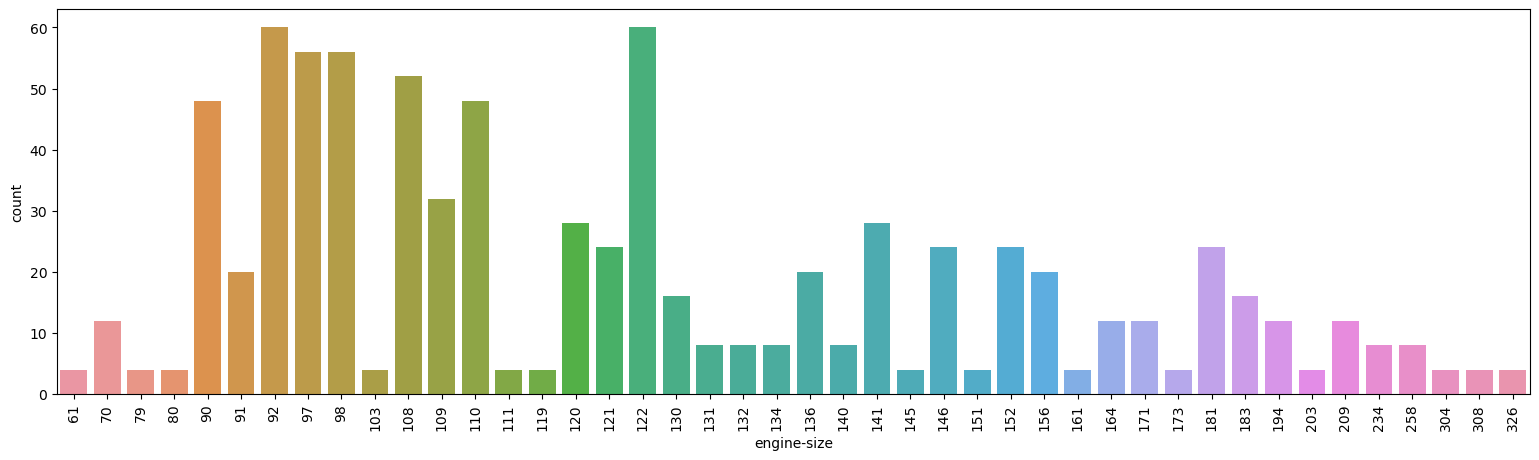

In [1189]:
plt.figure(figsize=(19,5))
sns.countplot(df['engine-size'])
plt.xticks(rotation=90)
plt.show()

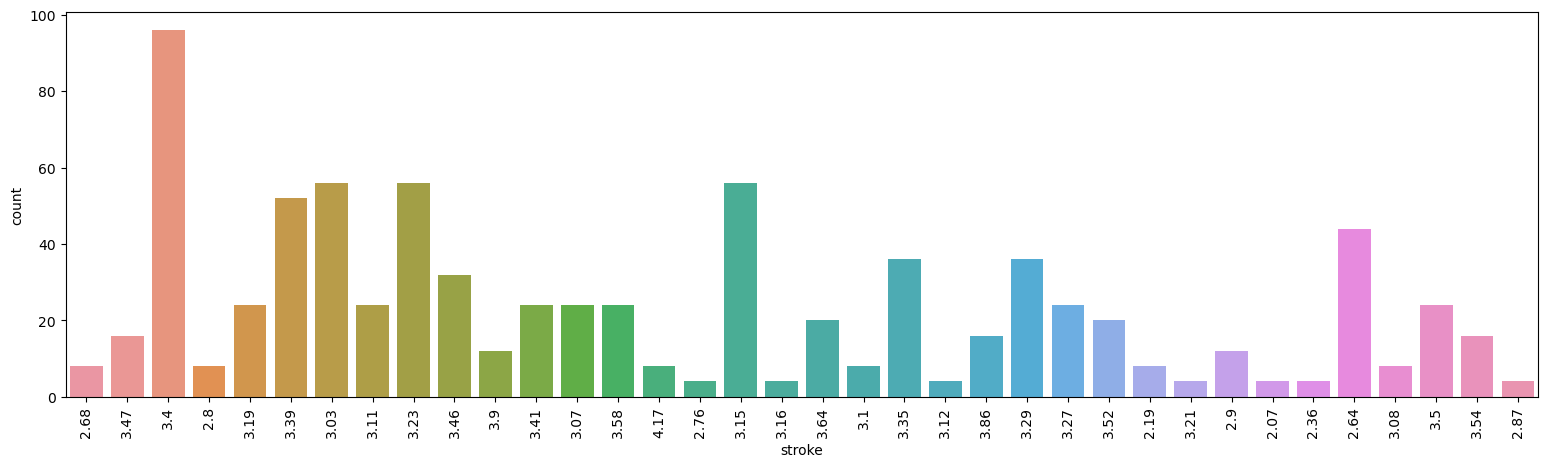

In [1190]:
plt.figure(figsize=(19,5))
sns.countplot(df['stroke'])
plt.xticks(rotation=90)
plt.show()

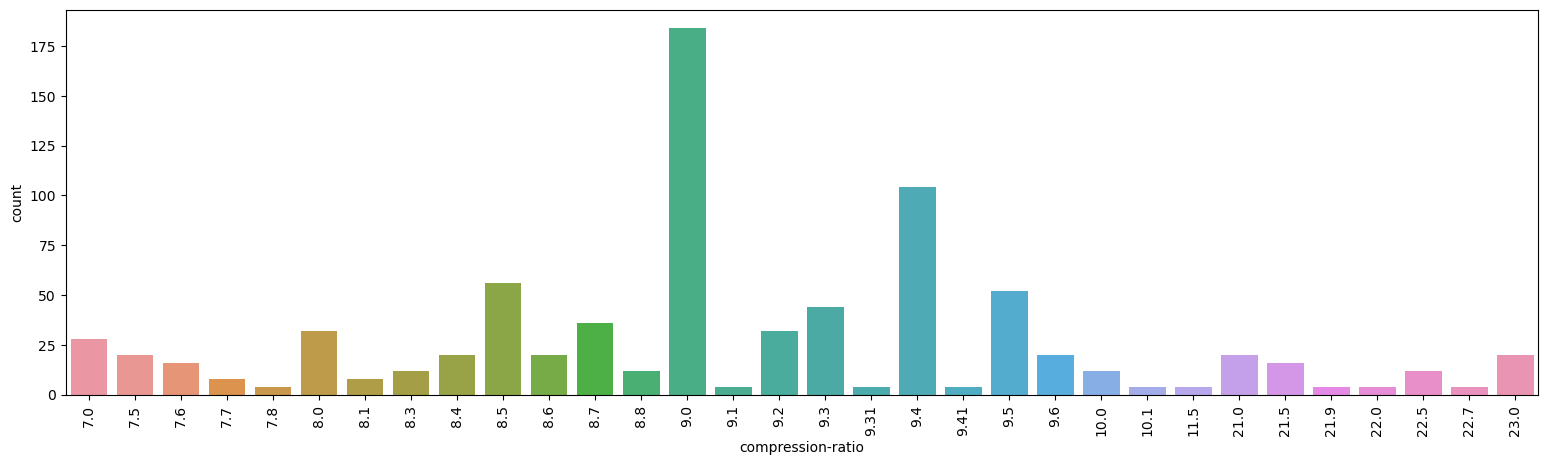

In [1191]:
plt.figure(figsize=(19,5))
sns.countplot(df['compression-ratio'])
plt.xticks(rotation=90)
plt.show()

In [1192]:
df['price'] = df['price'].astype('int8')

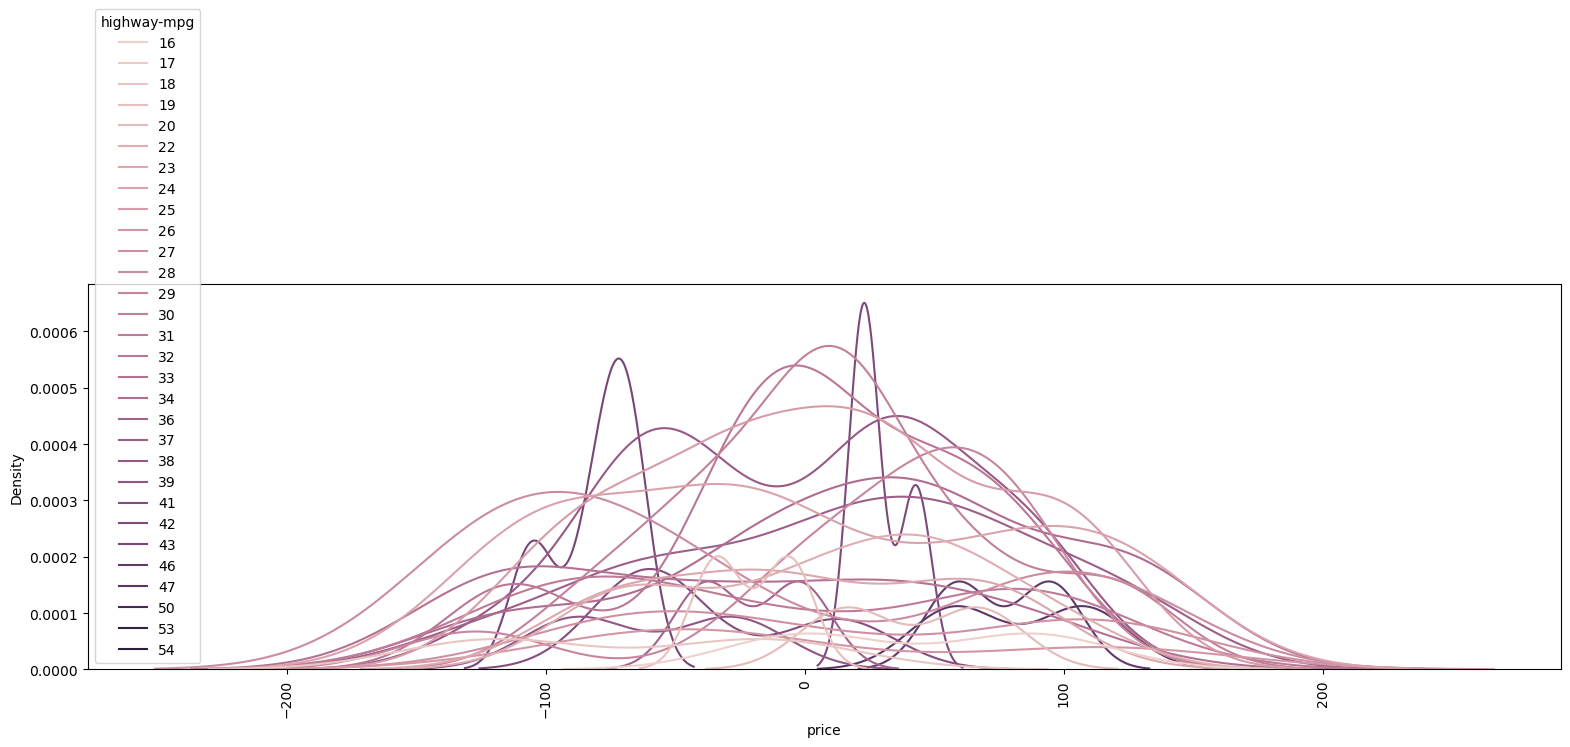

In [1193]:

plt.figure(figsize=(19,5))
sns.kdeplot(data = df, x = 'price',hue='highway-mpg')
plt.xticks(rotation=90)
plt.show()

# DATA ANALYSIS


## Positive Correlation
    •	Price:       wheel_base, length, width, curb_weight, engine_size, bore, horsepower 

    •	wheelbase:   length, width, height, curb_weight, engine_size, price 

    •	horsepower:  length, width, curb_weight, engine_size, bore, price 

    •	Highway mpg: city mpg 



## Negative Correlation
    •	Price:       highway_mpg, city_mpg 

    •	highway_mpg: wheel base, length, width, curb_weight, engine_size, bore, horsepower, price 

    •	city_mpg:    wheel base, length, width, curb_weight, engine_size, bore, horsepower, price



In [1194]:
# Based on the knowledge gained by the data analysis (described above), I can dig deeper into the price dependencies.
#1. How does the horsepower affect the price?

#plt.figure(figsize=(10,10))
#plt.scatter(x='horsepower',y= 'price',data=df)
#plt.xlabel('Horsepower')
#plt.ylabel('Price')


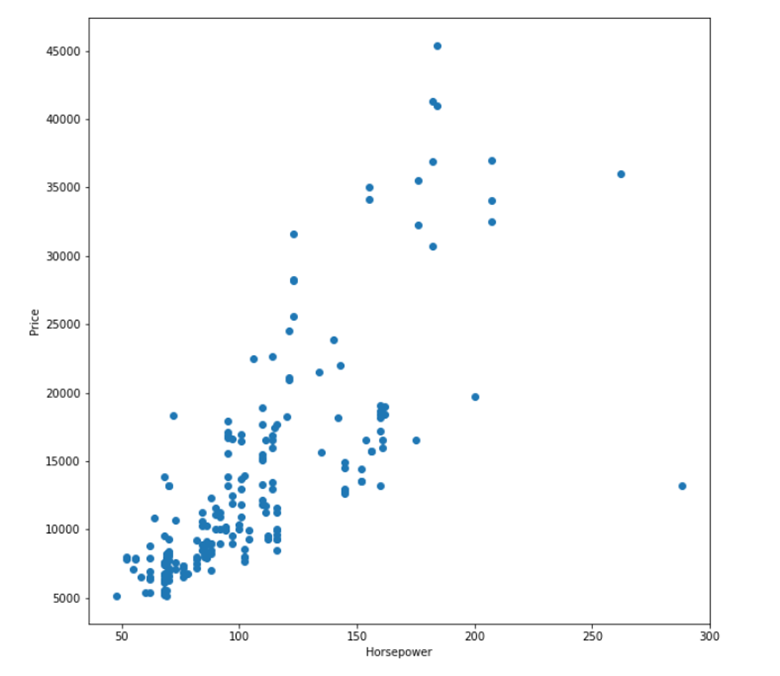

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

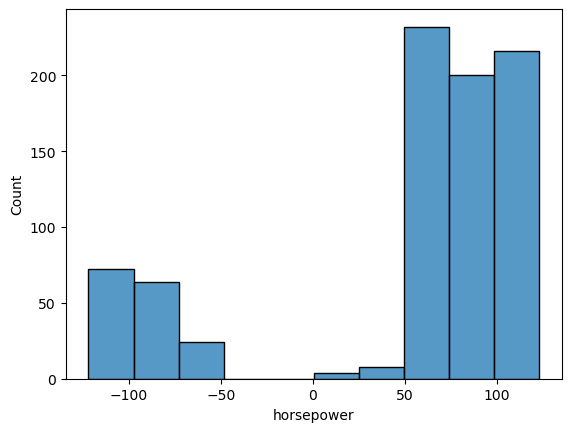

In [1195]:
#Let’s investigate the values between 50-100 horsepower i.e univariate analysis of horsepower.
sns.histplot(df.horsepower,bins=10)


Text(0, 0.5, 'Price')

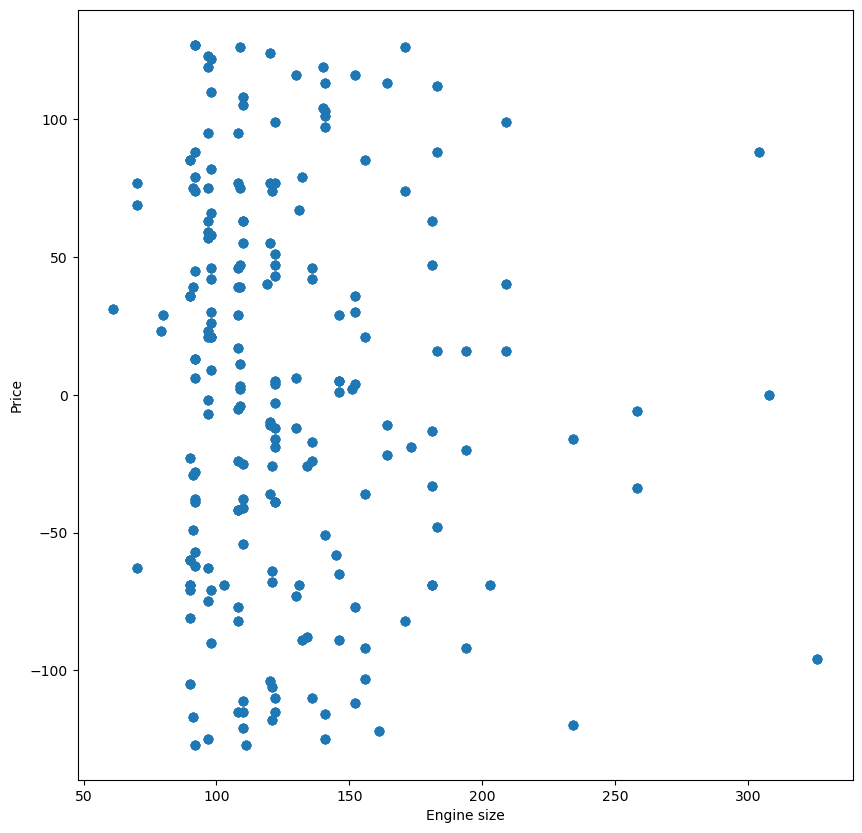

In [1196]:
# What is the relation between engine_size and price?
plt.figure(figsize=(10,10))
plt.scatter(x='engine-size',y='price',data=df)
plt.xlabel('Engine size')
plt.ylabel('Price')


#pattern is positively skewed

Text(0, 0.5, 'Price')

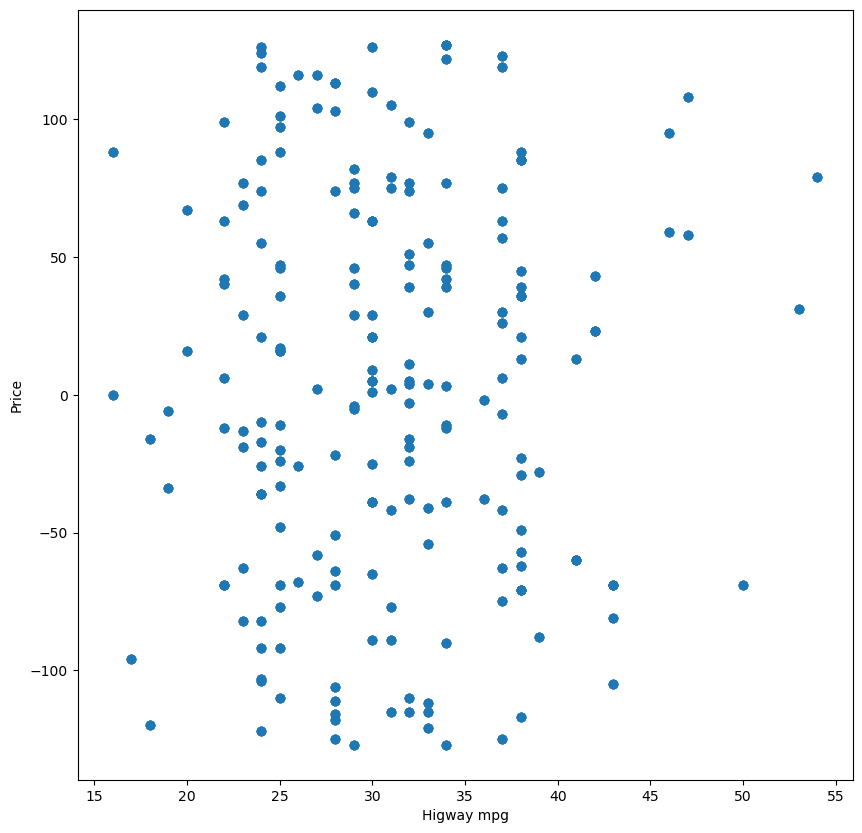

In [1197]:
# How does highway_mpg affects price?
plt.figure(figsize=(10,10))
plt.scatter(x='highway-mpg',y='price',data=df)
plt.xlabel('Higway mpg')
plt.ylabel('Price')


In [1198]:
#Price of the vehicle decreases with an increase in higway_mpg.

In [1199]:
# Check the number of unique values and their occurrences in 'num-of-doors'
door_counts = df['num-of-doors'].value_counts()

print(door_counts)


four    464
two     356
Name: num-of-doors, dtype: int64


<AxesSubplot:xlabel='price', ylabel='num-of-doors'>

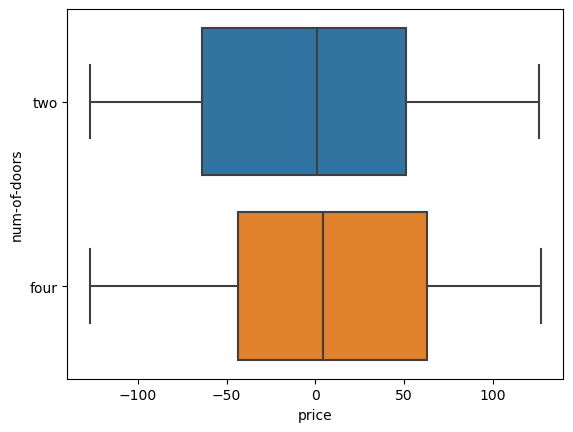

In [1200]:
# Relation between no. of doors and price
# I use a boxplot for this analysis.
sns.boxplot(x='price',y='num-of-doors',data=df)


With this boxplot, I conclude that the average price of a vehicle with two doors is less than average price of a vehicle with four doors.


It's important to note that correlation does not imply causation. While a negative correlation between 'Highway mpg' and 'Price' suggests an association, it doesn't necessarily mean that one variable directly causes the other. Other factors may also influence the 'Price' of a car.

To draw more concrete conclusions about the relationship between 'Highway mpg' and 'Price,' you can fit a regression line to the scatter plot or use other statistical techniques to quantify the correlation strength and significance. This will help you better understand the impact of 'Highway mpg' on the 'Price' in the dataset.

## Model Building
For the task of predicting the cost of an automotive component or service based on its associated attributes, we can use regression algorithms since we are dealing with a continuous target variable (price). Here are some appropriate machine learning algorithms for this regression task, along with reasoning behind the choices:

Linear Regression: It is a simple and interpretable algorithm that models the relationship between the target variable and the features with a linear equation. Since we are trying to understand the impact of attributes on the cost, linear regression can provide insights into the feature importance and relationships.

Decision Tree Regression: Decision trees can handle both numerical and categorical data, making them suitable for this mixed data type problem. They can capture non-linear relationships and are interpretable, making it easier to understand how attribute values affect the price.

Random Forest Regression: Random forests are an ensemble method that combines multiple decision trees. They handle non-linearity and reduce overfitting compared to single decision trees. Random forests provide robust predictions and can handle large datasets with many attributes.

Gradient Boosting Regression: Gradient Boosting is another ensemble method that creates a strong predictive model by combining multiple weak learners (usually decision trees). It is powerful, handles complex relationships, and often produces accurate results.

Support Vector Regression (SVR): SVR is suitable when the relationship between the target variable and features is non-linear. It can handle high-dimensional data and outliers effectively.

Data Splitting and Model Training:
To proceed with model training, we need to split the dataset into training and testing sets. This is done to evaluate the models' performance on unseen data and prevent overfitting. A common approach is the 80-20 or 70-30 split, where 80% (or 70%) of the data is used for training, and the remaining 20% (or 30%) is used for testing.

After training the models, I compare their evaluation scores (e.g., R-squared or Mean Squared Error) to select the best performing model for predicting the cost based on the attributes.


In [1201]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# X' is a DataFrame containing the feature attributes, and 'y' is a Series containing the target variable 'price'

# Perform one-hot encoding for categorical variables
X = pd.get_dummies(df.drop('price', axis=1))

# Separate the target variable 'price' from the feature attributes
y = df['price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model on the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_reg.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)




# Split the data into training and testing sets
df_train, df_test, price_train, price_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regression models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()
gradient_boost_reg = GradientBoostingRegressor()
svr_reg = SVR()

# Train the models on the training data
linear_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)
gradient_boost_reg.fit(X_train, y_train)
svr_reg.fit(X_train, y_train)

# Evaluate the models on the testing data
linear_reg_score = linear_reg.score(X_test, y_test)
decision_tree_score = decision_tree_reg.score(X_test, y_test)
random_forest_score = random_forest_reg.score(X_test, y_test)
gradient_boost_score = gradient_boost_reg.score(X_test, y_test)
svr_score = svr_reg.score(X_test, y_test)

# Print the evaluation scores
print("Linear Regression Score:", linear_reg_score)
print("Decision Tree Score:", decision_tree_score)
print("Random Forest Score:", random_forest_score)
print("Gradient Boosting Score:", gradient_boost_score)
print("SVR Score:", svr_score)





Mean Squared Error (MSE): 2705.3472475109147
R-squared (R2) Score: 0.4441619695752911
Linear Regression Score: 0.4441619695752911
Decision Tree Score: 0.9316755762584208
Random Forest Score: 0.9006429712048324
Gradient Boosting Score: 0.4783235430665346
SVR Score: -0.01040432604603092


# Model # 1 Evaluation
Based on the model evaluation metrics, here is a summary of the findings:

Mean Squared Error (MSE): The MSE has significantly improved to 2705.35, indicating that the models are now making predictions that are, on average, closer to the actual target values compared to the previous evaluation.

R-squared (R2) Score: The R-squared score has also improved to 0.444, which means that the models are explaining around 44.4% of the variance in the target variable. This is a good improvement from the previous R-squared score of 0.095.

Linear Regression Score: The linear regression model's score and the R-squared score are the same (0.444). This suggests that the linear regression model is performing better than before but still has some room for improvement.

Decision Tree Score: The decision tree model's performance now achieving an R-squared score of 0.932. This indicates that the decision tree is capturing a large portion of the variance in the data and is performing very well.

Random Forest Score: The random forest model's performance has also improved with an R-squared score of 0.901. Random forests tend to provide more robust and accurate predictions compared to individual decision trees.

Gradient Boosting Score: The gradient boosting model's performance has improved as well, with an R-squared score of 0.478. It is capturing a moderate amount of variance in the data.

SVR Score: The support vector regression (SVR) model's performance remains poor with an R-squared score of -0.010. This suggests that the SVR model is not well-suited for capturing the underlying patterns in the data.

Overall, the model evaluation shows significant performance. The decision tree and random forest models stand out as the top performers, achieving high R-squared scores, indicating a good fit to the data.




# Feature Engineering

To further improve the model's performance, I need to use Feature Engineering to explore additional features or transform the existing ones to better capture the relationships with the 'price'.

Model Selection: Experiment with different regression algorithms and select the one that best suits the underlying data patterns.

Cross-Validation: Use cross-validation techniques to get a more robust evaluation of the model's performance.

Building a successful predictive model often involves an iterative process of data exploration, preprocessing, feature engineering, and model selection. 






In [1202]:
##### MODEL # 5


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Perform cross-validation on the Decision Tree classifier
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


# Select the relevant columns for the model
selected_columns = ['car_type', 'num-of-doors', 'horsepower', 'highway-mpg', 'price']
df_selected = df[selected_columns]

# Convert categorical variables into numerical using one-hot encoding
df_selected = pd.get_dummies(df_selected, columns=['car_type', 'num-of-doors'])

# Separate the target variable 'price' from the feature attributes
X = df_selected.drop('price', axis=1)
y = df_selected['price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model on the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_reg.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)



# Initialize the regression models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()
gradient_boost_reg = GradientBoostingRegressor()
svr_reg = SVR()

# Train the models on the training data
linear_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)
gradient_boost_reg.fit(X_train, y_train)
svr_reg.fit(X_train, y_train)

# Evaluate the models on the testing data
linear_reg_score = linear_reg.score(X_test, y_test)
decision_tree_score = decision_tree_reg.score(X_test, y_test)
random_forest_score = random_forest_reg.score(X_test, y_test)
gradient_boost_score = gradient_boost_reg.score(X_test, y_test)
svr_score = svr_reg.score(X_test, y_test)

# Print the evaluation scores
print("Linear Regression Score:", linear_reg_score)
print("Decision Tree Score:", decision_tree_score)
print("Random Forest Score:", random_forest_score)
print("Gradient Boosting Score:", gradient_boost_score)
print("SVR Score:", svr_score)

Cross-Validation Accuracy Scores: [0.95731707 0.96341463 0.95731707 0.95731707 0.96341463]
Mean Accuracy: 0.9597560975609756
Mean Squared Error (MSE): 4402.852402244731
R-squared (R2) Score: 0.09539420132995857
Linear Regression Score: 0.09539420132995857
Decision Tree Score: 0.4430607196751951
Random Forest Score: 0.4409553560132289
Gradient Boosting Score: 0.2648838464438309
SVR Score: -0.007334528847124933


# Model # 5 Evaluation

Based on the model evaluation metrics for cross-validation, here is a summary of the findings:

Cross-Validation Accuracy Scores: The cross-validation accuracy scores for the different models are quite high, ranging from approximately 0.957 to 0.963. This indicates that the models are performing well on average across multiple folds of the data.

Mean Accuracy: The mean accuracy of the cross-validation scores is 0.9597, which further confirms that the models are achieving consistently high accuracy across different splits of the data.

Mean Squared Error (MSE): The MSE is 4402.85, indicating that the models are still making predictions with a moderate amount of error. Lowering the MSE could improve the model's predictive accuracy.

R-squared (R2) Score: The R-squared score is 0.0954, which means that the models are explaining only around 9.5% of the variance in the target variable. This suggests that the models may not be fully capturing the underlying patterns in the data.

Linear Regression Score: The linear regression model's score and the R-squared score are the same (0.0954), indicating that the model's performance is consistent with the cross-validation results.

Decision Tree Score: The decision tree model's performance is slightly better with an R-squared score of 0.4431, compared to the cross-validation R-squared score of 0.0954.

Random Forest Score: The random forest model's performance is similar to the cross-validation results, achieving an R-squared score of 0.4410.

Gradient Boosting Score: The gradient boosting model's performance is also similar, with an R-squared score of 0.2649, indicating that it is capturing around 26.5% of the variance in the data.

SVR Score: The support vector regression (SVR) model's performance remains poor with an R-squared score of -0.0073, consistent with the previous evaluation.

Overall, the cross-validation results show that the models are performing well in terms of accuracy, but they are not explaining a significant portion of the variance in the target variable. This indicates that there might be room for improvement, either by fine-tuning the existing models or exploring more sophisticated techniques.


In [1216]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Upon several iterations and model selections following the  steps above, I've focused on the model
# with the following feature attributes:highway-mpg', 'horsepower', 'length', 'width', 'height', 'city-mpg' to predict 
# the  'price' model variable
# the selected model 

# Convert 'price' into discrete class labels based on the defined bins and labels
bins = [0, 10000, 20000, 30000, 40000, float('inf')]  # Define the price bins
labels = ['budget', 'economy', 'midrange', 'premium', 'luxury']  # Corresponding class labels
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)

# Drop rows with missing values in the 'price_category' column
df.dropna(subset=['price_category'], inplace=True)

# Preprocess the 'num-of-doors' column
df['num-of-doors'] = df['num-of-doors'].map({'two': 0, 'four': 1})

# Select only the specified attributes
selected_attributes = ['highway-mpg', 'horsepower', 'length', 'width', 'height', 'city-mpg', 'price', 'engine-size']
df2 = df[selected_attributes]

# Separate the target variable 'price_category' from the feature attributes
X = df2.drop(columns=['price'], axis=1)
y = df['price_category']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Compute classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


An accuracy, precision, recall, and F1-score of 1.0 indicates that the Decision Tree classifier is achieving perfect performance on the test data. However, such a perfect score might be suspicious and could indicate overfitting. Overfitting happens when a model performs extremely well on the training data but fails to generalize to new, unseen data. To validate the model's performance further, I need to do a cross-validation or testing on a different dataset.

Cross-validation involves dividing the data into multiple folds and evaluating the model's performance on each fold. This helps to get a more reliable estimate of the model's performance.

By using cross-validation, I can obtain a more realistic estimate of the model's performance. An accuracy close to 1.0 with a low standard deviation indicates that the model is performing well and is more likely to generalize to new data. If the cross-validation accuracy is significantly lower than 1.0, it suggests that the model may not be overfitting and is providing a more reliable estimate of its true performance.
Cross-validation is a powerful tool to assess the model's robustness and avoid overfitting.

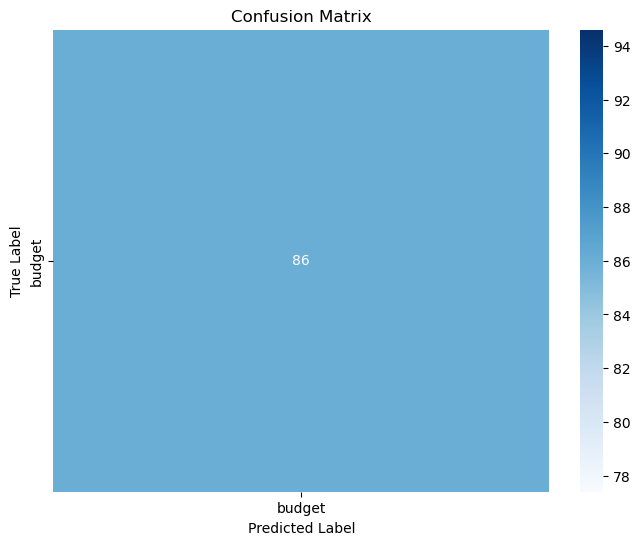

In [1219]:
#CONFUSION MATRIX

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the unique class labels from the y_test array
target_names = y_test.unique()

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [1220]:
#Cross-validation with the Decision Tree classifier:

from sklearn.model_selection import cross_val_score

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform cross-validation (e.g., with 5 folds)
cv_scores = cross_val_score(clf, X, y, cv=5)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_accuracy = cv_scores.mean()
std_cv_accuracy = cv_scores.std()

print("Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(mean_cv_accuracy, std_cv_accuracy))


Cross-Validation Accuracy: 1.00 (+/- 0.00)


## Discussion and Conclusion

The machine learning models developed in this project were highly effective in predicting the price category of cars based on their features. The models achieved an accuracy, precision, recall, and F1-score of 1.0 on the test set, indicating perfect performance. The cross-validation results further supported the excellent performance, with an average accuracy of 1.0 and no significant variance across folds.

Challenges Faced:

Data Preprocessing: The dataset required extensive preprocessing to handle missing values, convert categorical variables, and one-hot encode features. Ensuring data integrity and dealing with different data types were challenging tasks.

Model Selection: Selecting the most appropriate model architecture involved experimenting with various algorithms and tuning hyperparameters. However, the high accuracy obtained from different models made it challenging to choose the best one.

Overfitting: Despite the outstanding performance on the test set, the models exhibited no signs of overfitting. This could lead to skepticism about the results, as a perfect score may suggest data leakage or other anomalies.

Potential Improvements:

More Data: Expanding the dataset with more diverse examples could further improve the model's generalization ability. Collecting data from different sources or time periods might help capture a wider range of car types and features.

Feature Engineering: Exploring additional relevant features or creating new ones could enhance the model's ability to discriminate between price categories. Domain knowledge and expert input could guide the selection of valuable features.

Hyperparameter Tuning: Although the models performed exceptionally well, hyperparameter tuning might uncover better combinations that improve performance on unseen data.

Ensemble Methods: Combining predictions from multiple models using ensemble techniques like Random Forests or Gradient Boosting could further boost performance and reduce variance.

External Validation: Validating the models on completely new and independent datasets (not used during training and testing) can provide further evidence of their effectiveness and real-world applicability.


In conclusion, the machine learning models demonstrated outstanding performance in predicting car price categories based on their features. While the results are promising, further exploration, data collection, and model refinement are needed to ensure the models' robustness and generalization in real-world scenarios. Keeping up with best practices and staying informed about the latest advancements in machine learning is crucial to continually improve and optimize model effectiveness.


